# Projet sur la base de donnée du Titanic

# Importation des librairies nécessaires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importation des bases de données

In [2]:
train = pd.read_csv('train.csv', sep=',', encoding='utf-8')
test = pd.read_csv('test.csv', sep=',', encoding='utf-8')

# Vérification des bases de données

In [3]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
for col in train.columns:
    print('%s : %s, %s'%(col, len(train[col].unique()), len(train[train[col].isnull() == False]) / len(train) * 100))

PassengerId : 891, 100.0
Survived : 2, 100.0
Pclass : 3, 100.0
Name : 891, 100.0
Sex : 2, 100.0
Age : 89, 80.13468013468014
SibSp : 7, 100.0
Parch : 7, 100.0
Ticket : 681, 100.0
Fare : 248, 100.0
Cabin : 148, 22.895622895622896
Embarked : 4, 99.77553310886644


In [6]:
for col in test.columns:
    print('%s : %s, %s'%(col, len(test[col].unique()), len(test[test[col].isnull() == False]) / len(test) * 100))

PassengerId : 418, 100.0
Pclass : 3, 100.0
Name : 418, 100.0
Sex : 2, 100.0
Age : 80, 79.42583732057416
SibSp : 7, 100.0
Parch : 8, 100.0
Ticket : 363, 100.0
Fare : 170, 99.76076555023924
Cabin : 77, 21.770334928229666
Embarked : 3, 100.0


In [7]:
del train['Cabin']
del test['Cabin']

In [8]:
test.dropna(subset=['Fare'], axis=0, inplace=True)

In [9]:
train.dropna(subset=['Embarked'], axis=0, inplace=True)

In [10]:
corr = train.corr()
print(np.abs(corr['Survived']).sort_values())

PassengerId    0.005028
SibSp          0.034040
Age            0.082446
Parch          0.083151
Fare           0.255290
Pclass         0.335549
Survived       1.000000
Name: Survived, dtype: float64


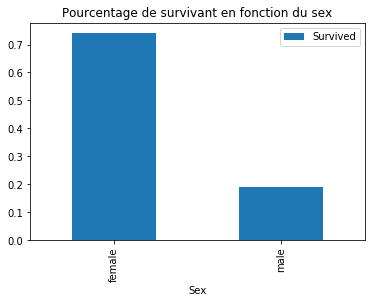

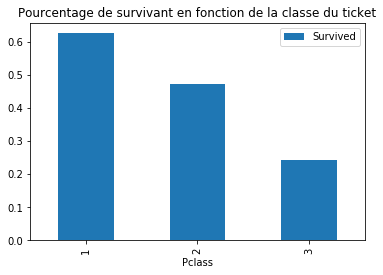

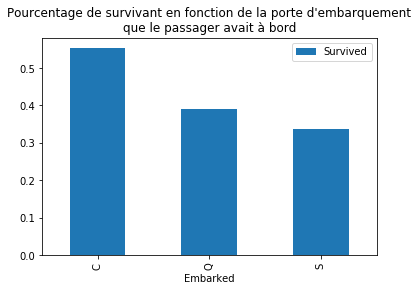

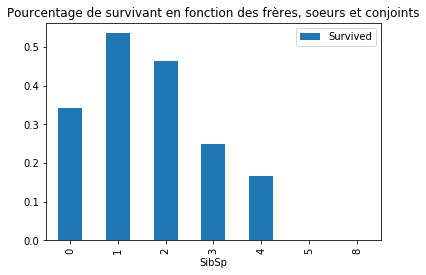

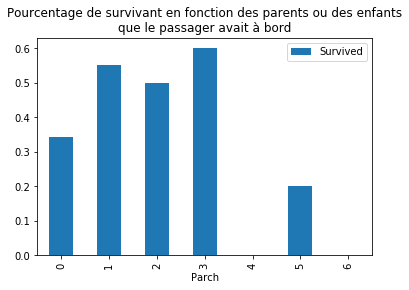

In [22]:
sex_plot = train.pivot_table(index="Sex",values="Survived")
sex_plot.plot.bar(title="Pourcentage de survivant en fonction du sex")

pclass_plot = train.pivot_table(index="Pclass",values="Survived")
pclass_plot.plot.bar(title="Pourcentage de survivant en fonction de la classe du ticket")

embarked_plot = train.pivot_table(index="Embarked",values="Survived")
embarked_plot.plot.bar(title="Pourcentage de survivant en fonction de la porte d'embarquement\nque le passager avait à bord")

sibsp_plot = train.pivot_table(index="SibSp",values="Survived")
sibsp_plot.plot.bar(title='Pourcentage de survivant en fonction des frères, soeurs et conjoints')

parch_plot = train.pivot_table(index="Parch",values="Survived")
parch_plot.plot.bar(title="Pourcentage de survivant en fonction des parents ou des enfants\nque le passager avait à bord")

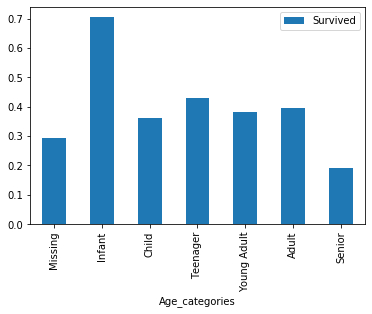

In [23]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

cut_points = [-1,0, 5, 12, 18, 35, 60, 100]
label_names = ["Missing", 'Infant', "Child", 'Teenager', "Young Adult", 'Adult', 'Senior']

train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

age_cat_pivot = train.pivot_table(index="Age_categories",values="Survived")
age_cat_pivot.plot.bar(title="Pourcentage de survivant en fonction de leur classe d'âge")
plt.show()

In [28]:
print('%s, %s'%(train['Age'].mean(), np.median(train['Age'])))

23.640798650168726, 24.0
